# Model Predictions with Ultralytics YOLO
by MJRovai @ 07Sept2025

https://docs.ultralytics.com/modes/predict/

In [1]:
import time
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

/home/mjrovai/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
!ls ./images

beatles.jpg  bus.jpg


In [6]:
!ls models

yolo11n_ncnn_model  yolo11n.pt	    yolo11n.torchscript  yolov8n.pt
yolo11n-pose.pt     yolo11n-seg.pt  yolov8n_ncnn_model	 yolov8n.torchscript


In [7]:
model_path= "./models/yolo11n.pt"
task = "detect" # Task: ‘detect’, ‘segment’, ‘classify’, ‘pose’, etc.
verbose = False # Verbose output during model initialization

In [8]:
# Load a pretrained YOLO11n model
model = YOLO(model_path, task, verbose)

In [9]:
# Open an image using PIL
source = Image.open("./images/bus.jpg")

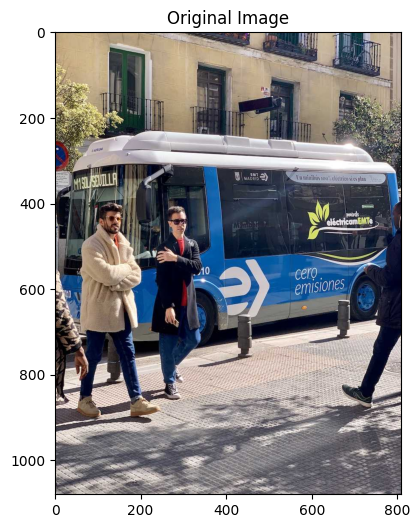

In [10]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(source)
#plt.axis('off')  # This turns off the axis numbers
plt.title("Original Image")
plt.show()

In [11]:
# Run inference on the source
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 640x480 4 persons, 1 bus, 7528.3ms
Speed: 278.0ms preprocess, 7528.3ms inference, 192.3ms postprocess per image at shape (1, 3, 640, 480)


In [12]:
# Run inference again on the source
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 640x480 4 persons, 1 bus, 2822.1ms
Speed: 38.9ms preprocess, 2822.1ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 480)


`Usually, the first time that an inference is run, the latency is greater. `

In [13]:
verbose = True
model = YOLO(model_path, task, verbose)

results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)


0: 640x480 4 persons, 1 bus, 2802.1ms
Speed: 36.9ms preprocess, 2802.1ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 480)


`results` is a list. 

In [14]:
len(results)

1

In [15]:
result = results[0]
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [16]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.])
conf: tensor([0.9402, 0.8882, 0.8783, 0.8558, 0.6219])
data: tensor([[3.8327e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02, 9.4015e-01, 5.0000e+00],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02, 8.8822e-01, 0.0000e+00],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0420e+02, 8.7825e-01, 0.0000e+00],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02, 8.5577e-01, 0.0000e+00],
        [2.1726e-02, 5.5607e+02, 6.8885e+01, 8.7236e+02, 6.2192e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[400.0136, 478.8882, 792.3619, 499.0480],
        [740.4135, 636.7728, 138.7925, 483.8794],
        [143.3527, 651.8801, 191.8959, 504.6299],
        [283.7633, 634.5622, 121.4086, 451.7471],
        [ 34.4536, 714.2138,  68.8637, 316.2908]])
xywhn: tensor([[0.4938, 0.4434, 0.9782, 0.4621],
        [0.9141, 0.5896, 0.1713, 0.4480],
        [0.17

In [17]:
result.boxes.cls

tensor([5., 0., 0., 0., 0.])

In [18]:
result.names[0]

'person'

In [19]:
result.names[5]

'bus'

In [20]:
result.boxes.conf

tensor([0.9402, 0.8882, 0.8783, 0.8558, 0.6219])

In [21]:
result.boxes.data

tensor([[3.8327e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02, 9.4015e-01, 5.0000e+00],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02, 8.8822e-01, 0.0000e+00],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0420e+02, 8.7825e-01, 0.0000e+00],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02, 8.5577e-01, 0.0000e+00],
        [2.1726e-02, 5.5607e+02, 6.8885e+01, 8.7236e+02, 6.2192e-01, 0.0000e+00]])

**Geometric Attributes**
- xywh: Tensor with bounding box coordinates in center_x, center_y, width, height format, in pixels.
- xywhn: Normalized center_x, center_y, width, height, scaled to the image dimensions, values in .
- xyxy: Tensor of boxes as x1, y1, x2, y2 in pixels, representing the top-left and bottom-right corners.
- xyxyn: Normalized x1, y1, x2, y2, scaled by image width and height, values in .

In [22]:
result.boxes.xyxy

tensor([[3.8327e+00, 2.2936e+02, 7.9619e+02, 7.2841e+02],
        [6.7102e+02, 3.9483e+02, 8.0981e+02, 8.7871e+02],
        [4.7405e+01, 3.9957e+02, 2.3930e+02, 9.0420e+02],
        [2.2306e+02, 4.0869e+02, 3.4447e+02, 8.6044e+02],
        [2.1726e-02, 5.5607e+02, 6.8885e+01, 8.7236e+02]])

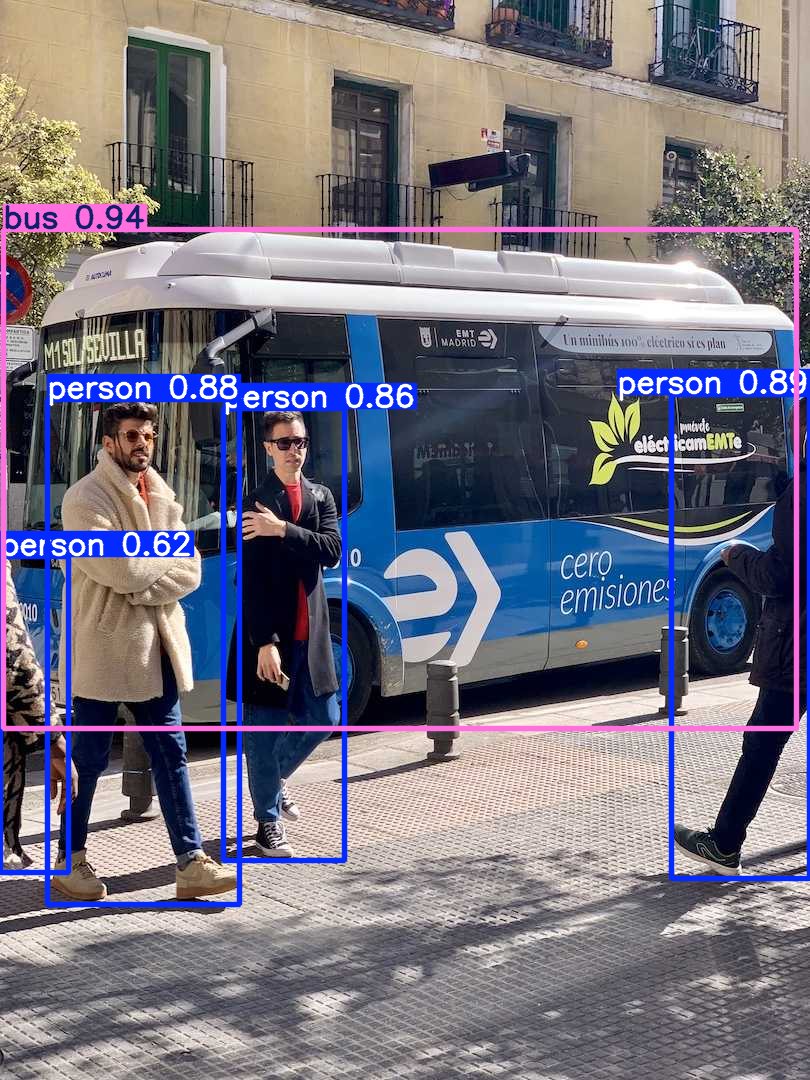

In [23]:
result.show()  # display to screen

In [24]:
im_bgr = result.plot()
img = Image.fromarray(im_bgr[..., ::-1])

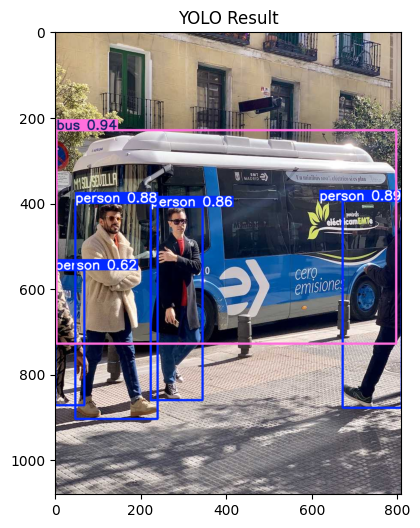

In [25]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
#plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

In [26]:
width, height = img.size
width, height

(810, 1080)

In [27]:
result.save(filename="bus_result.jpg")  # save to disk

'bus_result.jpg'

In [28]:
ls ./images/

beatles.jpg  bus.jpg


In [29]:
source = Image.open("./images/beatles.jpg")

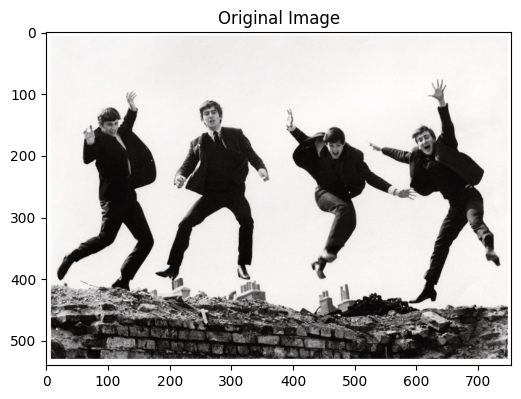

In [30]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(source)
#plt.axis('off')  # This turns off the axis numbers
plt.title("Original Image")
plt.show()

In [31]:
results = model.predict(source, save=False, imgsz=640, conf=0.5, iou=0.3)
result = results[0]


0: 480x640 4 persons, 7446.5ms
Speed: 462.4ms preprocess, 7446.5ms inference, 174.8ms postprocess per image at shape (1, 3, 480, 640)


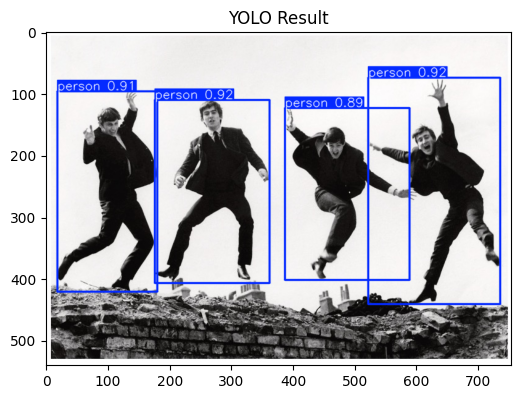

In [32]:
im_bgr = result.plot()
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
#plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

The plot() method in Ultralytics YOLO Results object accepts several arguments to control what is visualized on the image, including boxes, masks, keypoints, confidences, labels, and more.
Common Arguments for plot()
- boxes (bool): Show/hide bounding boxes. Default is True.
- conf (bool): Show/hide confidence scores. Default is True.
- labels (bool): Show/hide class labels. Default is True.
- masks (bool): Show/hide segmentation masks (when available, e.g. in segment tasks).
- kpt_line (bool): Draw lines connecting pose keypoints (skeleton diagram). Default is True in pose tasks.
- line_width (int): Set annotation line thickness.
- font_size (int): Set font size for text annotations.
- show (bool): If True, immediately display the image (interactive environments).

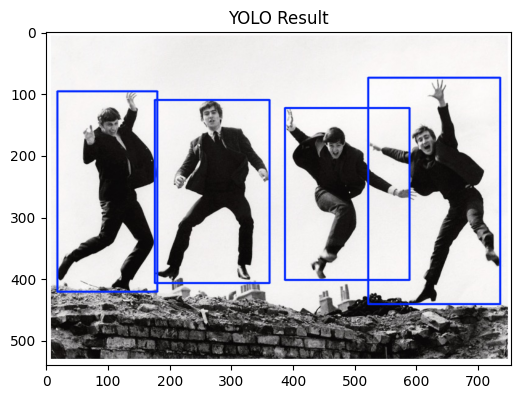

In [35]:
im_bgr = result.plot(boxes=True, labels=False, conf=False)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
#plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Result")
plt.show()

## Testing with other tasks

### Instance Segmentation

In [36]:
model_path= "./models/yolo11n-seg.pt"
task = "segment"
verbose = True

In [37]:
# Load a pretrained YOLO11n model
model = YOLO(model_path, task, verbose)

In [38]:
source = Image.open("./images/bus.jpg")

In [39]:
results = model.predict(source, save=False)
result = results[0]


0: 640x480 4 persons, 1 bus, 1 stop sign, 4695.4ms
Speed: 65.4ms preprocess, 4695.4ms inference, 174.7ms postprocess per image at shape (1, 3, 640, 480)


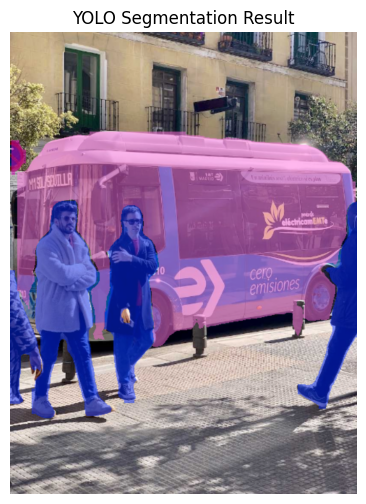

In [40]:
im_bgr = result.plot(boxes=False, conf=False, masks=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Segmentation Result")
plt.show()

In [41]:
source = Image.open("./images/beatles.jpg")

In [42]:
results = model.predict(source, save=False)
result = results[0]


0: 480x640 4 persons, 4246.0ms
Speed: 38.2ms preprocess, 4246.0ms inference, 47.4ms postprocess per image at shape (1, 3, 480, 640)


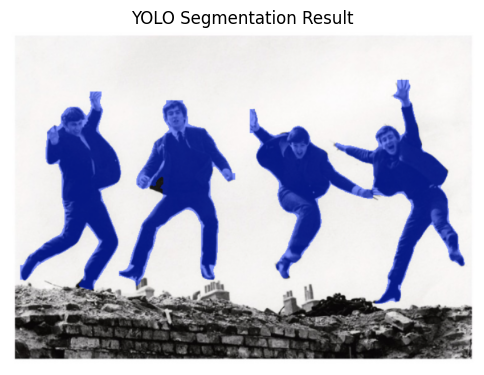

In [43]:
im_bgr = result.plot(boxes=False, conf=False, masks=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Segmentation Result")
plt.show()

### Pose Estimation

In [44]:
model_path= "./models/yolo11n-pose.pt"
task = "pose"
verbose = True

In [45]:
# Load a pretrained YOLO11n model
model = YOLO(model_path, task, verbose)

In [46]:
source = Image.open("./images/bus.jpg")

In [47]:
results = model.predict(source, save=False)
result = results[0]


0: 640x480 4 persons, 3175.5ms
Speed: 37.9ms preprocess, 3175.5ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 480)


In [48]:
im_bgr = result.plot(boxes=False, conf=False, kpt_line=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Pose Estimation Result")
plt.show()

In [49]:
source = Image.open("./images/beatles.jpg")
results = model.predict(source, save=False)
result = results[0]


0: 480x640 4 persons, 3078.9ms
Speed: 33.5ms preprocess, 3078.9ms inference, 9.6ms postprocess per image at shape (1, 3, 480, 640)


In [50]:
im_bgr = result.plot(boxes=False, conf=False, kpt_line=True)
img = Image.fromarray(im_bgr[..., ::-1])
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # This turns off the axis numbers
plt.title("YOLO Pose Estimation Result")
plt.show()